In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
df_customer = pd.read_csv('Customer_clean.csv')
df_product = pd.read_csv('Product_clean.csv')
df_store = pd.read_csv('Store_clean.csv')
df_transaction = pd.read_csv('Transaction_clean.csv')

# EDA

## 1. Data Transaction

In [3]:
df_transaction.head()

,transactionid,customerid,Date,productid,price,qty,totalamount,storeid
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [4]:
print("Total Data : ",df_transaction.shape)
print("Total Duplicated : ",df_transaction.duplicated().sum())
print(df_transaction.info())

Total Data :  (5020, 8)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  5020 non-null   object
 1   customerid     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   productid      5020 non-null   object
 4   price          5020 non-null   int64 
 5   qty            5020 non-null   int64 
 6   totalamount    5020 non-null   int64 
 7   storeid        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB
None


### Handle Duplicated Data

In [5]:
# Check duplicated by transactionid
df_transaction.duplicated(subset='transactionid').sum()

112

In [6]:
df_transaction = df_transaction.drop_duplicates(subset='transactionid',keep='last')
print("Total Data : ",df_transaction.shape)

Total Data :  (4908, 8)


### Fix unmatched data types

("Date" : Object) to (timestamp)

In [7]:
df_transaction['Date'].dtype

dtype('O')

In [8]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

## 2. Data Customer

In [9]:
df_customer.head()

,customerid,age,gender,Marital Status,income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [10]:
print("Total Data : ",df_customer.shape)
print("Total Duplicated : ",df_customer.duplicated().sum())
df_customer.info()

Total Data :  (444, 5)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerid      444 non-null    int64  
 1   age             444 non-null    int64  
 2   gender          444 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   income          444 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.5+ KB


## 3. Data Product

In [11]:
df_product.head()

,productid,Product Name,price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [12]:
print("Total Data : ",df_product.shape)
print("Total Duplicated : ",df_product.duplicated().sum())
df_product.info()

Total Data :  (10, 3)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   productid     10 non-null     object
 1   Product Name  10 non-null     object
 2   price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


## 4. Data Store

In [13]:
df_store.head()

,storeid,storename,groupstore,Type,latitude,longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [14]:
print("Total Data (Row,Col) : ",df_store.shape)
print("Total Duplicated : ",df_store.duplicated().sum())
df_store.info()

Total Data (Row,Col) :  (14, 6)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   storeid     14 non-null     int64  
 1   storename   14 non-null     object 
 2   groupstore  14 non-null     object 
 3   Type        14 non-null     object 
 4   latitude    14 non-null     float64
 5   longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


# Merge Data

In [15]:
df = df_transaction.copy()
df = df.merge(df_customer,how='left', on='customerid')
df = df.merge(df_product, how='left', on='productid')
df = df.merge(df_store, how='left', on='storeid')

# Delete duplicate column
df = df.drop(['price_y'], axis=1)

In [16]:
df.head()

,transactionid,customerid,Date,productid,price_x,qty,totalamount,storeid,age,gender,Marital Status,income,Product Name,storename,groupstore,Type,latitude,longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36.0,0.0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44.0,1.0,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27.0,1.0,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48.0,1.0,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33.0,0.0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664


# Feature Selection for Modeling 1 (ARIMA)

In [17]:
df_forecasting = df.groupby(by='Date')[['qty']].sum()
df_forecasting

,qty
Date,
2022-01-01,47
2022-01-02,45
2022-01-03,67
2022-01-04,98
2022-01-05,57
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


## Check Stasionarity
Jika di investigasi melalui line plot, maka data adalah `STASIONER`, Karena :
- Data tidak memiliki trend 
- Tidak terdapat pola seasonality (naik / turun dalam periode tertentu)

<AxesSubplot:xlabel='Date', ylabel='qty'>

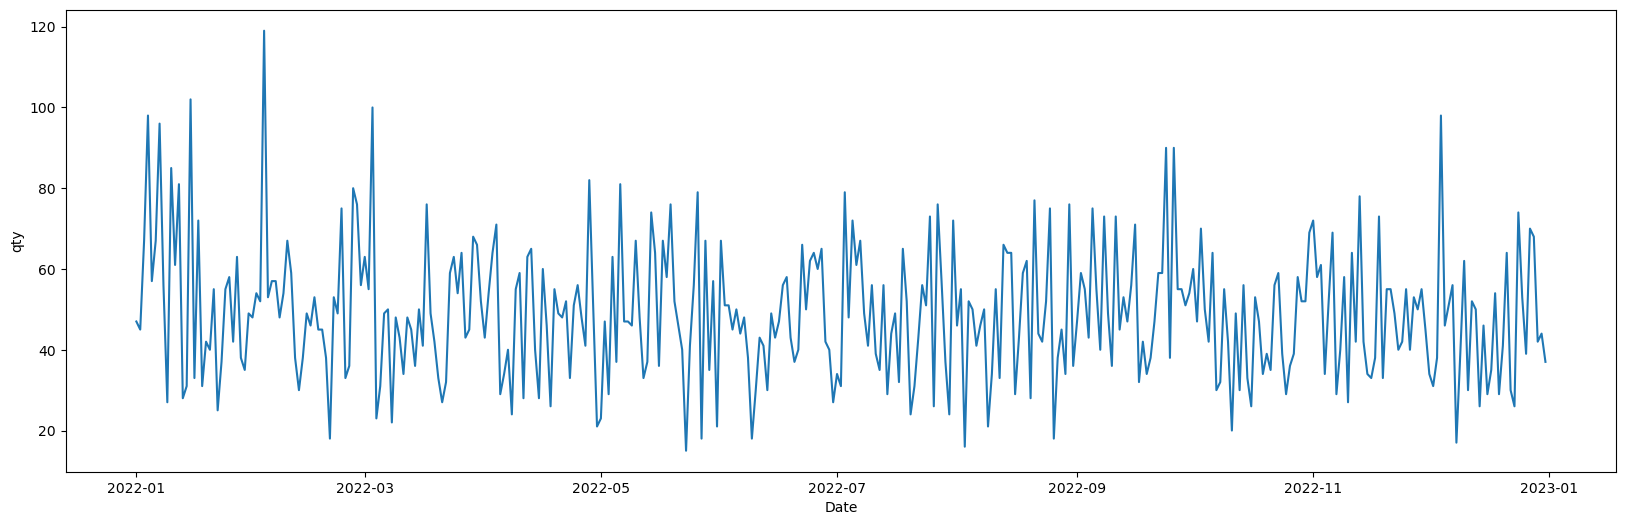

In [18]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df_forecasting, x=df_forecasting.index, y= 'qty')

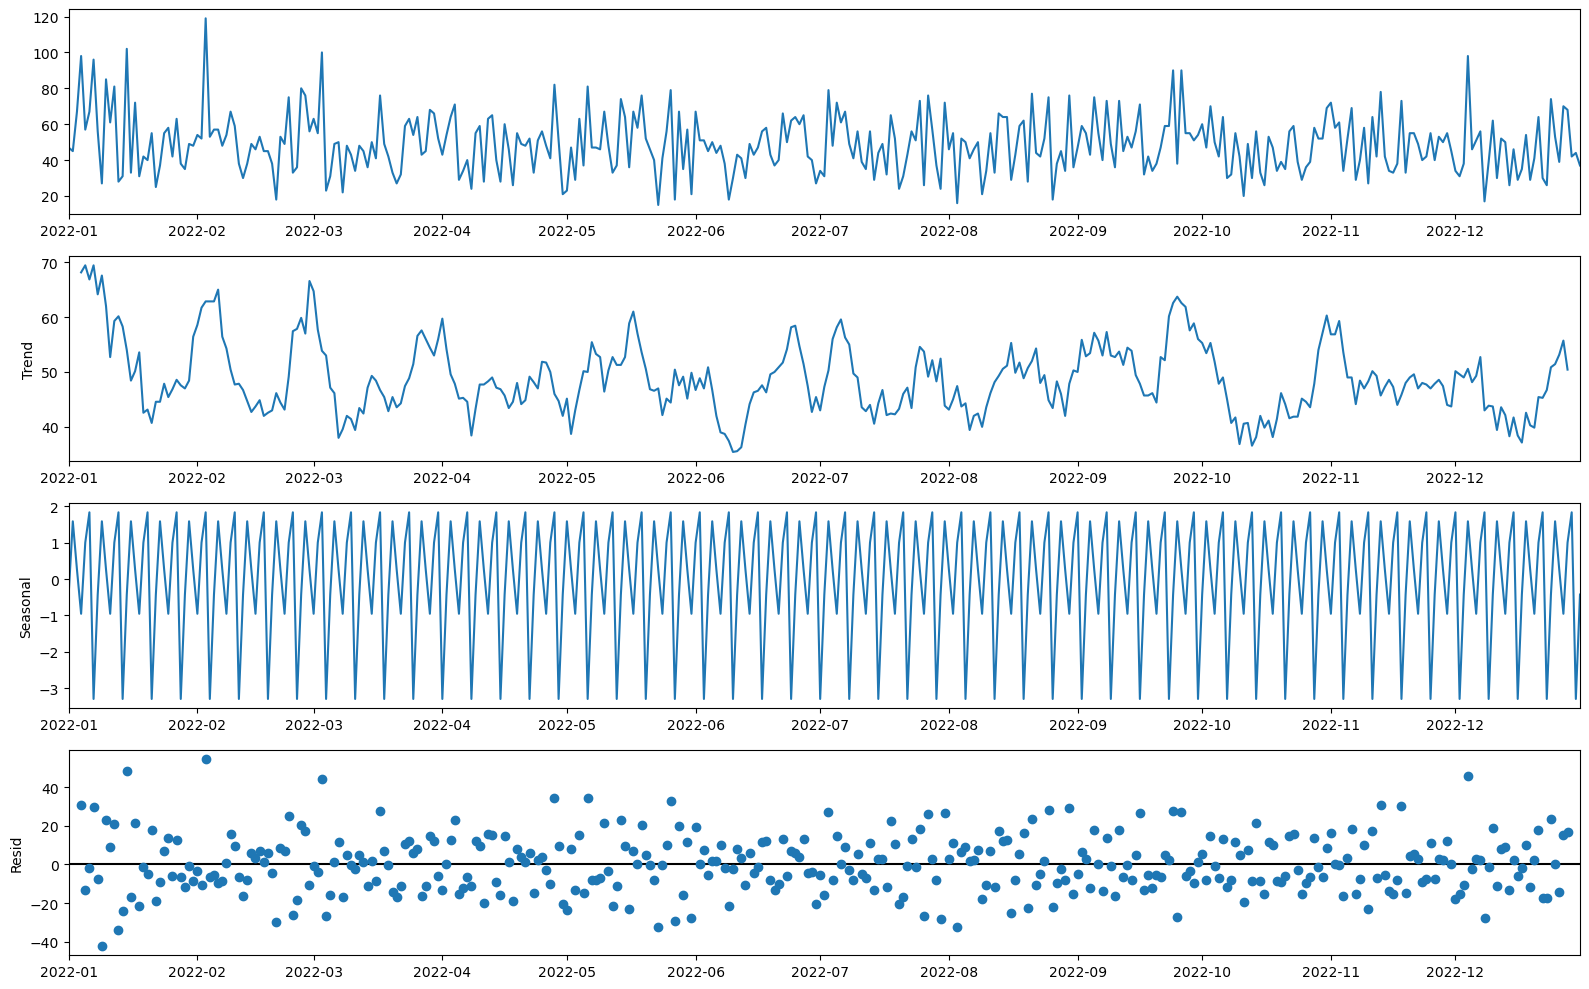

In [19]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(df_forecasting, model='additive')
fig = decomposition.plot()
plt.show()

### Augmented Dickey-Fuller Test (ADF)
- Hipotesis nol (Ho) dari uji ADF adalah bahwa deret waktu `Tidak Stasioner`. 
- Hipotesis alternatif (H1) dari uji ADF adalah bahwa deret waktu `Stasioner`.  
- Jadi, jika nilai P-value dari ADF kurang dari tresholsd critical value (0,05). maka kita menolak hipotesis nol dan menyimpulkan bahwa deret waktu tersebut memang stasioner.

Sehingga berdasarkan uji ADF (p-value < 0.05). Maka tolak H0, sehingga data tersebut adalah Stasioner

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_forecasting['qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.368681
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


## Find Parameter P,D,Q

### P (AR)
p=0

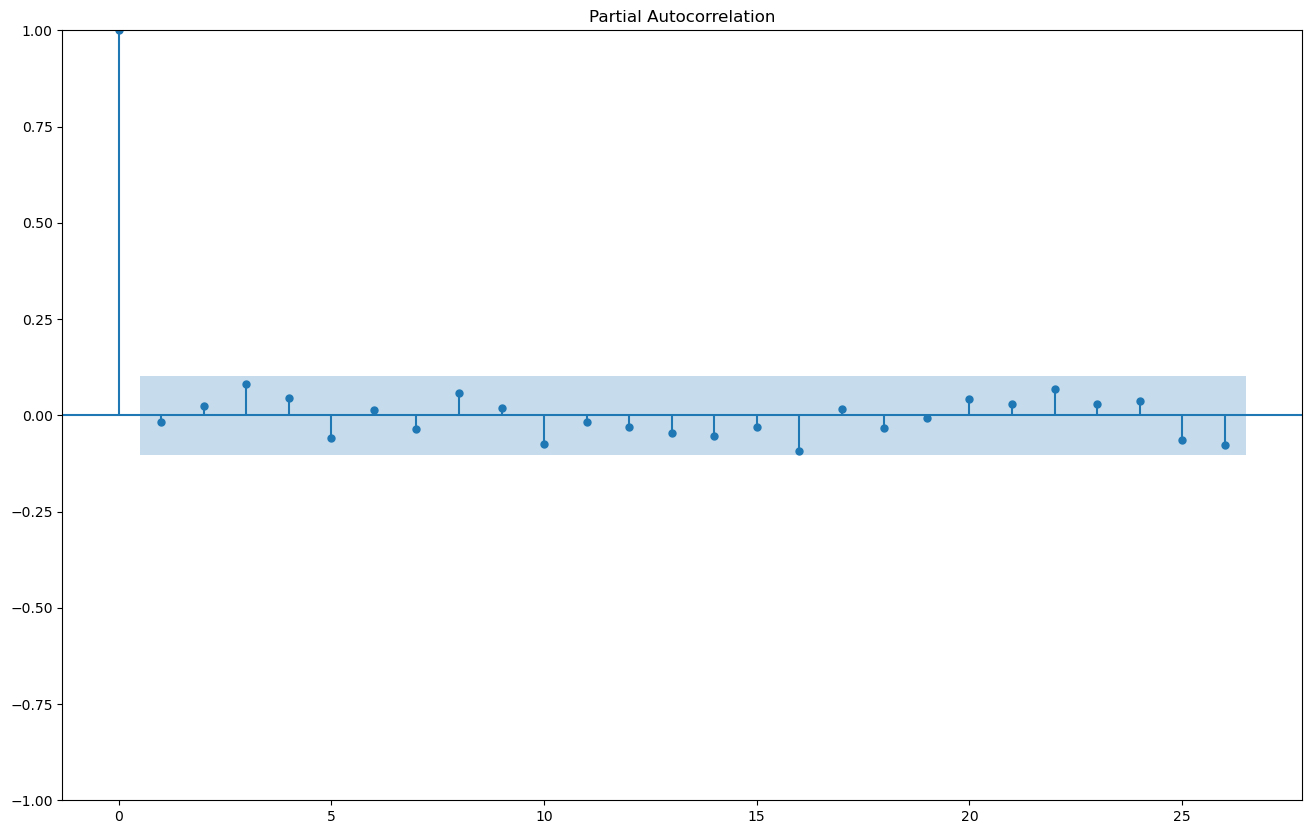

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_forecasting.qty)
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

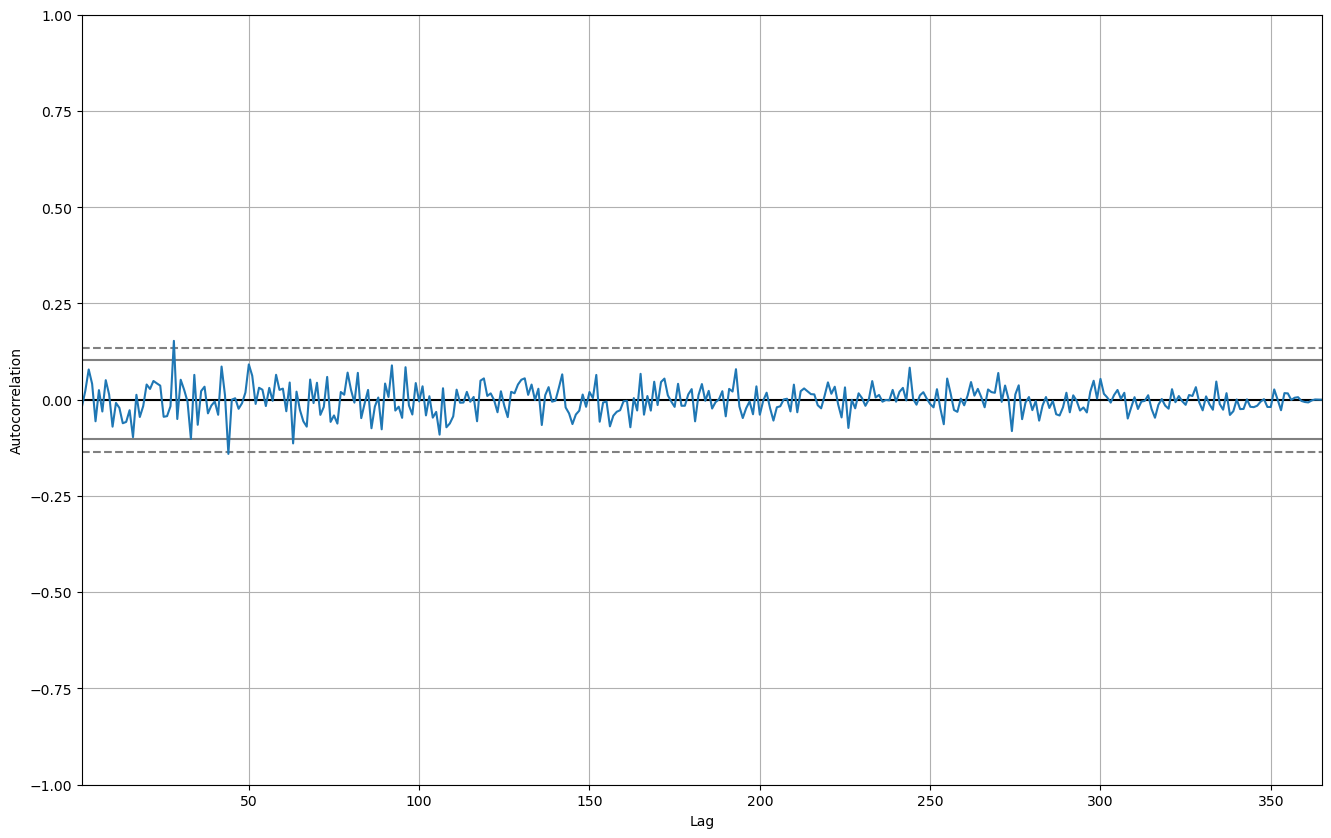

In [28]:
pd.plotting.autocorrelation_plot(df_forecasting)

### FIND Q (MA)
q = 0

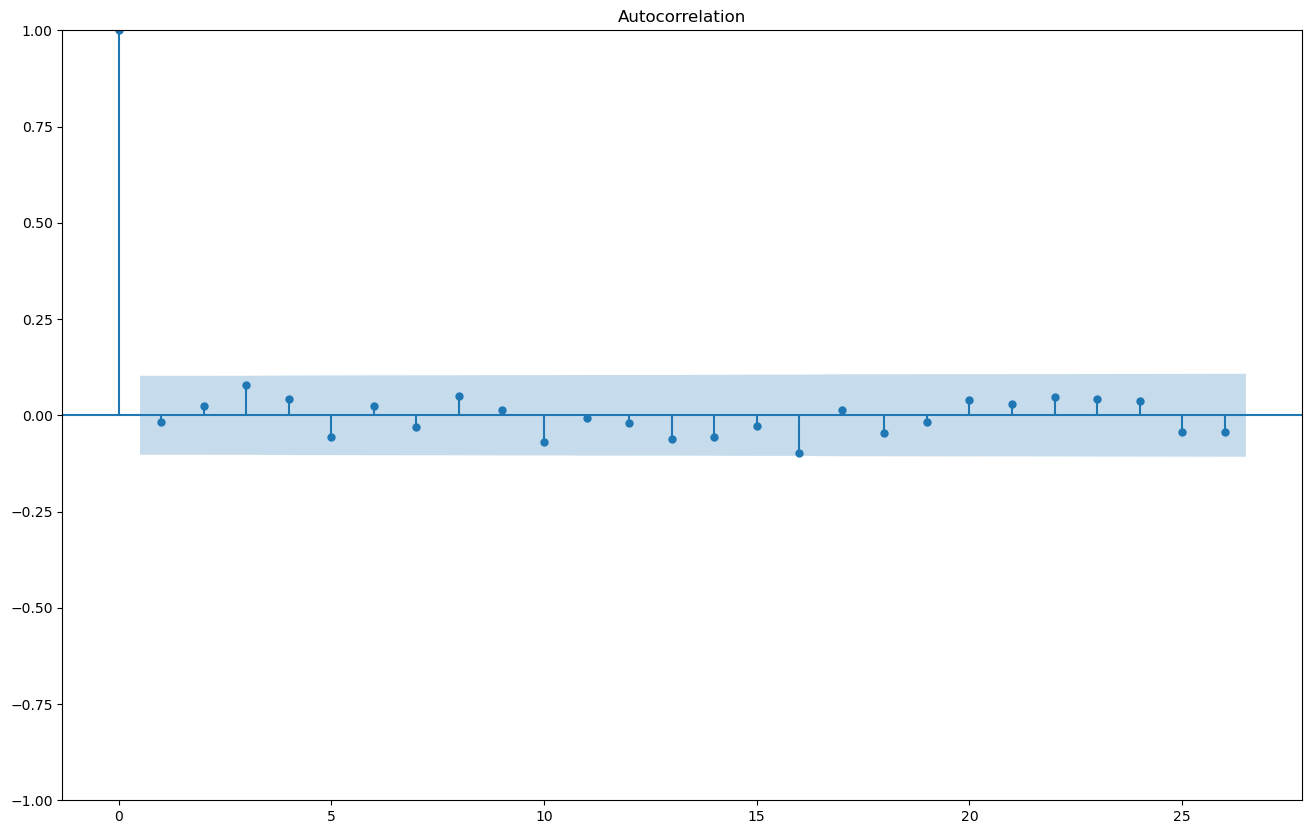

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_forecasting)
plt.show()

# ARIMA MODELLING

In [57]:
y=df_forecasting['qty']

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(40,1,2))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    qty   No. Observations:                  365
Model:                ARIMA(40, 1, 2)   Log Likelihood               -1516.534
Date:                Wed, 30 Aug 2023   AIC                           3119.068
Time:                        16:25:05   BIC                           3286.646
Sample:                    01-01-2022   HQIC                          3185.672
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7022      9.587     -0.073      0.942     -19.492      18.087
ar.L2         -0.0252      0.370     -0.068      0.946      -0.751       0.701
ar.L3          0.0581      0.092      0.632      0.5

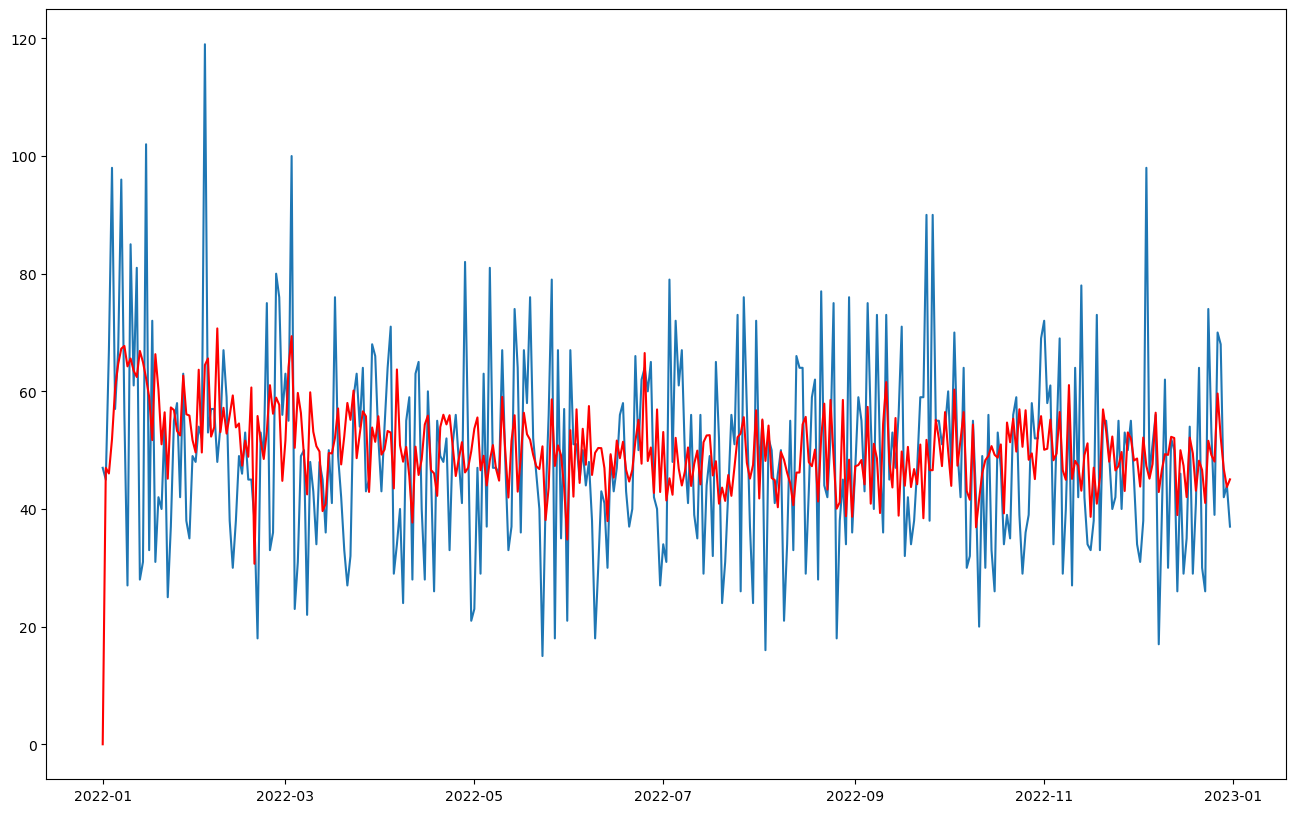

In [58]:
plt.plot(df_forecasting)
plt.plot(model_fit.fittedvalues, color='red')